In [ ]:
import pandas as pd
import numpy as np
import random as r
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Flatten,Dense,Dropout,LSTM,BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/bitcoin_cash_price.csv', parse_dates = ['Date'])
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,1543.27,1569.03,1414.35,1418.73,"820,947,000","26,199,800,000"
1,2018-02-19,1483.34,1553.81,1483.34,1534.77,"578,906,000","25,179,700,000"
2,2018-02-18,1552.10,1641.40,1428.49,1487.46,"907,873,000","26,344,200,000"
3,2018-02-17,1548.48,1568.64,1517.14,1551.39,"641,719,000","26,280,100,000"
4,2018-02-16,1373.16,1558.66,1369.68,1552.20,"961,010,000","23,302,000,000"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        213 non-null    datetime64[ns]
 1   Open        213 non-null    float64       
 2   High        213 non-null    float64       
 3   Low         213 non-null    float64       
 4   Close       213 non-null    float64       
 5   Volume      213 non-null    object        
 6   Market Cap  213 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 11.8+ KB


In [ ]:
data.shape

(213, 7)

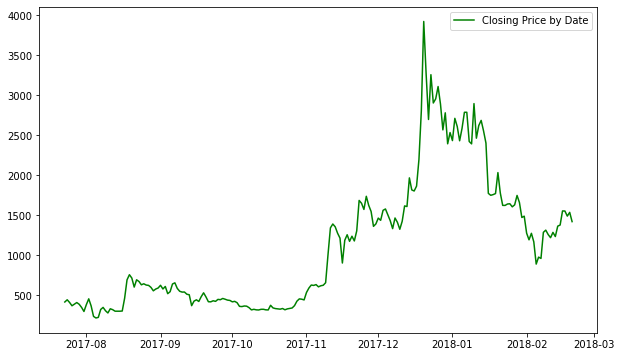

In [ ]:
#plot
plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['Close'],color = 'g')
plt.legend(['Closing Price by Date'])
plt.show()

In [ ]:
# Resversing The DataFrame
data = data.reindex(index=data.index[::-1])
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
212,2017-07-23,555.89,578.97,411.78,413.06,"85,013",-
211,2017-07-24,412.58,578.89,409.21,440.70,"190,952",-
210,2017-07-25,441.35,541.66,338.09,406.90,"524,908",-
209,2017-07-26,407.08,486.16,321.79,365.82,"1,784,640",-
208,2017-07-27,417.10,460.97,367.78,385.48,"533,207",-


In [ ]:
data = data.reset_index()
data.drop(columns = ['index'],inplace = True)
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-23,555.89,578.97,411.78,413.06,"85,013",-
1,2017-07-24,412.58,578.89,409.21,440.70,"190,952",-
2,2017-07-25,441.35,541.66,338.09,406.90,"524,908",-
3,2017-07-26,407.08,486.16,321.79,365.82,"1,784,640",-
4,2017-07-27,417.10,460.97,367.78,385.48,"533,207",-


In [ ]:
data.iloc[0,:]

Date          2017-07-23 00:00:00
Open                       555.89
High                       578.97
Low                        411.78
Close                      413.06
Volume                     85,013
Market Cap                      -
Name: 0, dtype: object

In [ ]:
features = []
for i in range(len(data['Open'])-30):
  features.append(data['Open'][i:i+30].values)
fea = np.array(features)

In [ ]:
fea[0]

array([555.89, 412.58, 441.35, 407.08, 417.1 , 386.65, 410.56, 385.14,
       346.36, 294.6 , 382.38, 448.49, 362.18, 231.11, 212.18, 223.76,
       321.35, 345.28, 305.21, 275.88, 327.82, 316.29, 296.1 , 298.19,
       297.97, 301.02, 458.67, 697.04, 772.42, 723.7 ])

In [ ]:
label = data['Close'].values[30:213]
# label

In [ ]:
df = pd.DataFrame(fea)
df['target'] = label
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,target
0,555.89,412.58,441.35,407.08,417.10,386.65,410.56,385.14,346.36,294.60,382.38,448.49,362.18,231.11,212.18,223.76,321.35,345.28,305.21,275.88,327.82,316.29,296.10,298.19,297.97,301.02,458.67,697.04,772.42,723.70,690.88
1,412.58,441.35,407.08,417.10,386.65,410.56,385.14,346.36,294.60,382.38,448.49,362.18,231.11,212.18,223.76,321.35,345.28,305.21,275.88,327.82,316.29,296.10,298.19,297.97,301.02,458.67,697.04,772.42,723.70,596.19,669.40
2,441.35,407.08,417.10,386.65,410.56,385.14,346.36,294.60,382.38,448.49,362.18,231.11,212.18,223.76,321.35,345.28,305.21,275.88,327.82,316.29,296.10,298.19,297.97,301.02,458.67,697.04,772.42,723.70,596.19,690.96,628.11
3,407.08,417.10,386.65,410.56,385.14,346.36,294.60,382.38,448.49,362.18,231.11,212.18,223.76,321.35,345.28,305.21,275.88,327.82,316.29,296.10,298.19,297.97,301.02,458.67,697.04,772.42,723.70,596.19,690.96,670.03,641.05
4,417.10,386.65,410.56,385.14,346.36,294.60,382.38,448.49,362.18,231.11,212.18,223.76,321.35,345.28,305.21,275.88,327.82,316.29,296.10,298.19,297.97,301.02,458.67,697.04,772.42,723.70,596.19,690.96,670.03,627.06,625.32


In [ ]:
x = df.drop(columns = ['target'])
y = df['target']
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
X_train = X_train.values.reshape(X_train.shape[0],X_train.shape[1],1)
x_test = x_test.values.reshape(x_test.shape[0],x_test.shape[1],1)


In [ ]:
X_train.shape,y_train.shape

((146, 30, 1), (146,))

In [ ]:
model = Sequential()
model.add(LSTM(64,input_shape = (30,1),return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(84,return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            16896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 64)            256       
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 128)           512       
_________________________________________________________________
lstm_8 (LSTM)                (None, 30, 84)           

In [ ]:
model.compile(optimizer='adam',
              loss = 'mean_squared_error',
              metrics = ['mean_squared_error'])

In [ ]:
epochs = model.fit(X_train,y_train,verbose=1,epochs=500,batch_size=32)

Epoch 1/500
5/5 [==============================] - 0s 63ms/step - loss: 2279172.0000 - mean_squared_error: 2279172.0000
Epoch 2/500
5/5 [==============================] - 0s 61ms/step - loss: 2243372.5000 - mean_squared_error: 2243372.5000
Epoch 3/500
5/5 [==============================] - 0s 63ms/step - loss: 2178869.0000 - mean_squared_error: 2178869.0000
Epoch 4/500
5/5 [==============================] - 0s 65ms/step - loss: 2095480.5000 - mean_squared_error: 2095480.5000
Epoch 5/500
5/5 [==============================] - 0s 64ms/step - loss: 2011443.2500 - mean_squared_error: 2011443.2500
Epoch 6/500
5/5 [==============================] - 0s 65ms/step - loss: 1913314.6250 - mean_squared_error: 1913314.6250
Epoch 7/500
5/5 [==============================] - 0s 64ms/step - loss: 1797202.3750 - mean_squared_error: 1797202.3750
Epoch 8/500
5/5 [==============================] - 0s 62ms/step - loss: 1724804.1250 - mean_squared_error: 1724804.1250
Epoch 9/500
5/5 [=======================

In [ ]:
pre = model.predict(x_test)
print(f'mean_squared_error :{mean_squared_error(pre,y_test)*100}')

mean_squared_error :2209970.15404207


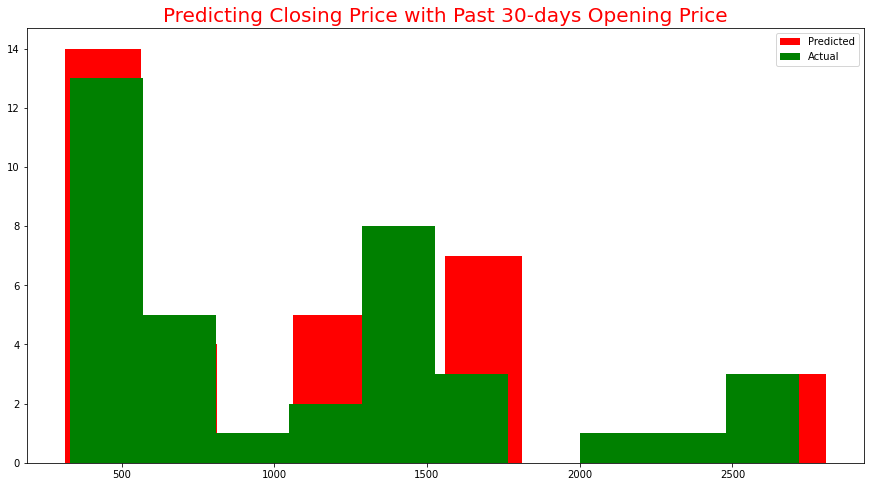

In [ ]:
plt.figure(figsize = (15,8))
plt.hist(y_test,color = 'r')
plt.hist(pre,color = 'g')
plt.legend(['Predicted','Actual'])
plt.title('Predicting Closing Price with Past 30-days Opening Price',size = 20,color = 'r')
plt.show()